## Nethack integration

Trying to integrate nethack with our genetic algorithm.

Generate new environment:

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from rules_new import RuleNew, initial_population, print_rule, make_rule_good
from fitness_new import FitnessCalculator, movement_score, proximity_score, find_distance_grid, get_population_fitness
from genetic_new import genetic_algorithm
from utility_func import *

In [48]:
import gym
import minihack

In [51]:
env=gym.make(
    "MiniHack-Room-Random-15x15-v0",
    observation_keys=("chars", "colors", "specials", "pixel"),
)
env.seed(17)
obs = env.reset() #Generate a new environment and save the describtions arrays in obs
env.render() #Print the room 


## Get the submatrix of the env

agent_position = search_environment_agent_position(obs["chars"])
goal_position = search_environment_goal_position(obs["chars"])

print(agent_position)
print(goal_position)
env_indexes = search_environment_indexes(obs["chars"])

## Produce a best rule based on that submatrix 




Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                .........>.....                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                           

## Apply genetic algorithm to find the best solution

In [52]:
initial_pop = initial_population(200)
for rule in initial_pop:
    make_rule_good(rule)
# Some shenanigans to make the code work

goal = goal_position[0] - 3, goal_position[1] - 32
agent = agent_position = agent_position[0] - 3, agent_position[1] - 32

print(agent)
print(goal)



(14, 3)
(0, 9)


In [53]:
distance_grid = find_distance_grid(*goal)
print(distance_grid)

[[ 9  8  7  6  5  4  3  2  1  0  1  2  3  4  5]
 [ 9  8  7  6  5  4  3  2  1  1  1  2  3  4  5]
 [ 9  8  7  6  5  4  3  2  2  2  2  2  3  4  5]
 [ 9  8  7  6  5  4  3  3  3  3  3  3  3  4  5]
 [ 9  8  7  6  5  4  4  4  4  4  4  4  4  4  5]
 [ 9  8  7  6  5  5  5  5  5  5  5  5  5  5  5]
 [ 9  8  7  6  6  6  6  6  6  6  6  6  6  6  6]
 [ 9  8  7  7  7  7  7  7  7  7  7  7  7  7  7]
 [ 9  8  8  8  8  8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
 [11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]
 [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12]
 [13 13 13 13 13 13 13 13 13 13 13 13 13 13 13]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]]


In [54]:
proximity_score = lambda distance: 1/np.sqrt(distance)
fitness_calculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

fitness_list = get_population_fitness(initial_pop, fitness_calculator)
fitness_list = np.array(fitness_list)
print(np.sum(fitness_list))

-76.63150949004203


In [55]:
fitness_list = fitness_list - np.min(fitness_list)
new_population, new_fitness, sum_fitnesses = genetic_algorithm(distance_grid=distance_grid,
                                                population=initial_pop,
                                                fitness_calculator=fitness_calculator,
                                                fitness_list=fitness_list,
                                                chance_for_mutation=0,
                                                n_iterations=600,
                                                n_rules=200)

print(sum_fitnesses)

100%|██████████| 600/600 [02:22<00:00,  4.20it/s]

[  313.10346686   678.59547043  1099.27592059  1371.44553299
  1644.23485659  1933.60708793  2319.30467528  2641.81419018
  2906.59080393  3181.79629422  3412.05191213  3654.56427558
  3974.44074978  4098.66695148  4343.15833209  4526.98624835
  4762.37269307  4875.68656182  5020.53655714  5112.97515003
  5268.79906278  5415.35094853  5461.13330859  5521.01931644
  5752.79656196  5939.90891668  6049.22628103  6168.14652233
  6269.32727659  6445.94008379  6534.40283032  6697.18326992
  6759.00875162  6976.37842233  7044.0190921   7205.22253891
  7219.31650525  7310.54815053  7307.06476924  7462.13505224
  7438.05696951  7530.14248761  7596.64438341  7679.05639544
  7701.19067009  7770.71697986  7910.00588471  7994.30568436
  8044.93128721  8049.99083815  8239.59527207  8348.07354023
  8425.85951555  8425.80075252  8436.91209236  8508.36445807
  8600.83065258  8688.89869563  8843.55588203  8872.84558688
  8891.7549073   8992.19437299  9051.51633421  9107.07689389
  9108.25251953  9190.68

In [56]:
new_fitness=np.array(new_fitness)
ind = np.argmax(new_fitness)
best_rule = new_population[ind]
print_rule(best_rule)

↘ ↘ ↙ ↘ → → ↘ ↘ → ← ← ↙ ↙ ↙ ↙ 
↘ ↓ ↓ ↓ ↗ → → ↗ ↗ ↖ ↖ ↓ ← ↖ ↙ 
↘ ↘ ↘ ↘ ↘ ↑ ↗ ↗ ↗ ↖ ↑ ↖ ↖ ↙ ↖ 
↘ ↘ ↗ ↖ ↘ → ↑ ↗ ↑ ↖ ↑ ↗ ↑ ← ↖ 
↘ ↘ ↑ ↗ → ↗ ↑ ↖ ↑ ↑ ↗ ↗ ↑ ↖ ↖ 
↗ ↗ ↘ ↖ ↗ ↑ ↑ ← ↖ ← ↖ ↖ ↑ ↑ ↖ 
↘ → → ↗ ↗ ↑ ↗ ↑ ↗ ↗ → ↖ ↖ ↖ ↑ 
↗ ↑ ↗ ↗ ↖ ↑ ↗ ← ↗ ↑ ↖ ↑ ↗ ↑ ↖ 
↑ ↗ → ↗ ↗ ↖ ↖ ↖ ↖ → ↑ ↖ ↑ ↗ ↑ 
↑ ↗ ↗ ↑ ↗ ↗ ↓ ↗ ← ↗ ← ← ↖ ↖ ↑ 
→ ↑ ↗ ↗ → → ↑ ↗ ← → ↗ ↖ ↗ ↑ ↖ 
↑ ↗ ↑ ↗ ↗ ↗ ↖ ↗ ↑ ↑ ↖ ↖ ↖ ↗ ↑ 
↑ ↖ → ↘ ↖ ↗ ↗ ↗ ↑ ← ↖ ↑ ↖ ↗ ↖ 
→ ↑ ← ↖ ↓ → ↖ ↗ ↖ ↓ ↗ ↘ ↖ ↖ ↖ 
↑ ↖ ↑ ↖ ↑ ↖ ↑ ↖ ↑ ↖ → ↖ ↖ → ↖ 


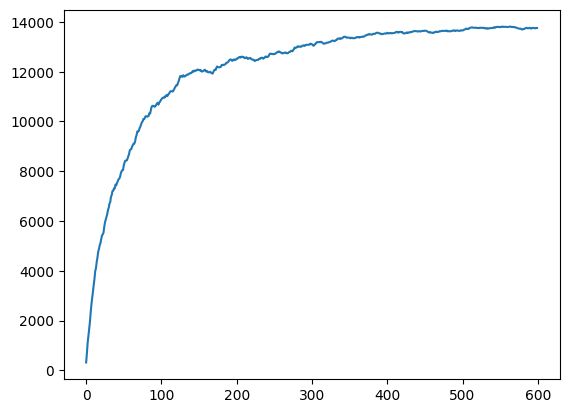

In [57]:
plt.plot(sum_fitnesses)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fitness_new import *

FitnessCalculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

# A matrix containing the directions of the arrows to the objective

# Get the fitness matrix
score_matrix = FitnessCalculator.fitness_matrix(best_rule)

print(score_matrix)


# Replace this with your actual matrix of scores
# For demonstration purposes, let's create a random matrix
matrix_of_scores = score_matrix 

[[ 0.33333333  0.35355339 -0.37796447  0.40824829  0.4472136   0.5
   0.57735027  0.70710678  1.          0.          1.          0.70710678
   0.57735027  0.5         0.4472136 ]
 [ 0.33333333  0.          0.          0.          0.4472136   0.5
   0.57735027  0.70710678  1.          0.          1.          0.
   0.57735027  0.5         0.4472136 ]
 [ 0.33333333  0.35355339  0.37796447  0.40824829  0.4472136   0.
   0.57735027  0.70710678  0.70710678  0.70710678  0.70710678  0.70710678
   0.57735027  0.5         0.4472136 ]
 [ 0.33333333  0.35355339  0.37796447 -0.40824829  0.4472136   0.5
   0.          0.57735027  0.57735027  0.57735027  0.57735027  0.
   0.          0.5         0.4472136 ]
 [ 0.33333333  0.35355339  0.          0.40824829  0.4472136   0.5
   0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.4472136 ]
 [ 0.33333333  0.35355339  0.37796447 -0.40824829  0.4472136   0.4472136
   0.4472136   0.          0.4472136   0.          

## Colormap

goal


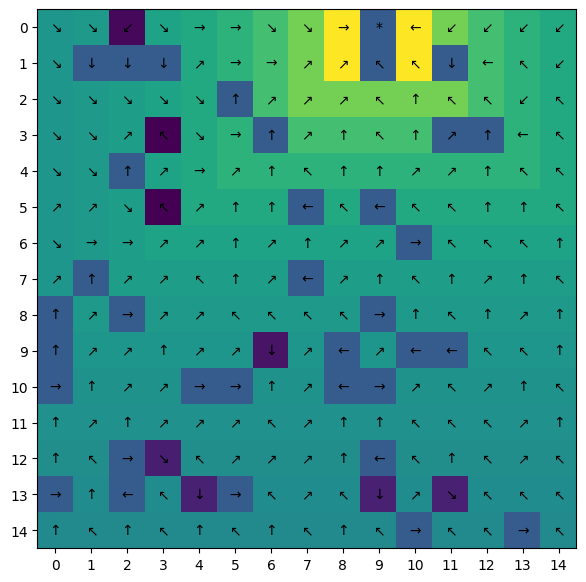

In [62]:
arrow_dictionary = {
    0 : "\u2191",
    1 : "\u2192",
    2 : "\u2193",
    3 : "\u2190",
    4 : "\u2197",
    5 : "\u2198",
    6 : "\u2199",
    7 : "\u2196",
}

# Replace these with your actual matrices and alphanumeric arrow values
matrix_of_scores = score_matrix
arrows_list = []

# Fill with all the right movements from print_rule(best_rule)
for i in range(15):
    for j in range(15):
        arrows_list.append(arrow_dictionary[best_rule.rules_grid[i][j]])

fig, ax = plt.subplots()
im = ax.imshow(matrix_of_scores)


#adjust the size of the figure
fig.set_size_inches(12, 7)

ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

for i in range(15):
    for j in range(15):
        if (i, j) == goal:
            print("goal")
            ax.annotate("*", xy=(j, i), ha='center', va='center', color='black')
        else:
            ax.annotate(arrows_list[i*15 + j], xy=(j, i), ha='center', va='center', color='black')


In [67]:
from rules_new import *
env.seed(17)
obs=env.reset()
env.render()
agent_position = search_environment_agent_position(obs["chars"])
agent = agent_position = agent_position[0] - 3, agent_position[1] - 32


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                .........>.....                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                           

In [68]:
## Apply the rule to the env (env.step) until the goal is reached

print("Goal position:", goal)
visited_position=np.zeros(shape=(15,15), dtype=int)
total_step=0

while agent != goal:
    
    print("Agent position:", agent)
    
    x, y = agent
    
    if visited_position[x][y]==1:
        movement=np.random.randint(0,7)
        while not good_movement((x,y), movement):
            movement = np.random.randint(0, 7)  # mutation
        env.step(movement)
    else:
        movement = best_rule.get_movement(x, y)
        env.step(movement)

    agent = (agent[0] + int_to_coord[movement][0], 
                        agent[1] + int_to_coord[movement][1])
   
    visited_position[x][y]=1
    total_step+=1

    if agent == goal:
        print("Goal reached!")
        break

    env.render()

print(total_step)


Goal position: (0, 9)
Agent position: (14, 3)

                                                                                
                                                                                
                                                                                
                                                                                
                                .........>.....                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............               